In [23]:
#libraries import
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import glob
import numpy as np
from sklearn.model_selection import train_test_split
import numpy as np
from matplotlib import pyplot as plt
import time
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
from sklearn import metrics

In [53]:
df = pd.read_csv("./malware-detection/tek_data.csv")

In [54]:
#deleting columnns permanently
df = df.drop('ID', axis=1)

In [55]:
y = df['legitimate']
x = df.drop('legitimate', axis=1)

In [56]:
x=(x-x.mean())/x.std()

In [59]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

In [71]:
# Define model
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(50, input_dim=54, activation= "relu"))
model.add(Dense(75, activation= "relu"))
model.add(Dense(100, activation= "relu"))
model.add(Dense(50, activation= "relu"))
model.add(Dense(1))
model.summary() #Print model Summary

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 50)                2750      
_________________________________________________________________
dense_40 (Dense)             (None, 75)                3825      
_________________________________________________________________
dense_41 (Dense)             (None, 100)               7600      
_________________________________________________________________
dense_42 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_43 (Dense)             (None, 1)                 51        
Total params: 19,276
Trainable params: 19,276
Non-trainable params: 0
_________________________________________________________________


In [72]:
# Compile model
model.compile(loss= "mean_squared_error" , optimizer="adam", metrics=["accuracy"])

In [74]:
# Fit Model
start_time = time.time()
model.fit(x_train, y_train, epochs=10)
end_time = time.time()

Epoch 1/10
117339/117339 [==============================] - 31s 268us/step - loss: 0.0063 - acc: 0.9923
Epoch 2/10
117339/117339 [==============================] - 31s 261us/step - loss: 0.0065 - acc: 0.9926
Epoch 3/10
117339/117339 [==============================] - 31s 262us/step - loss: 0.0059 - acc: 0.9927
Epoch 4/10
117339/117339 [==============================] - 32s 273us/step - loss: 0.0057 - acc: 0.9930
Epoch 5/10
117339/117339 [==============================] - 32s 275us/step - loss: 0.0056 - acc: 0.99330s - loss: 0.0056 - ac
Epoch 6/10
117339/117339 [==============================] - 29s 243us/step - loss: 0.0054 - acc: 0.9936
Epoch 7/10
117339/117339 [==============================] - 26s 222us/step - loss: 0.0054 - acc: 0.9934
Epoch 8/10
117339/117339 [==============================] - 27s 229us/step - loss: 0.0052 - acc: 0.9938
Epoch 9/10
117339/117339 [==============================] - 30s 258us/step - loss: 0.0051 - acc: 0.9940
Epoch 10/10
117339/117339 [===============

In [75]:
preds = model.evaluate(x=x_test, y=y_test)
print()
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

20708/20708 [==============================] - 3s 145us/step

Loss = 0.006588627301675724
Test Accuracy = 0.9926115510913657


In [82]:
pred = model.predict_classes(x=x_test)
print ("keras neural network Accuracy: " + str(metrics.accuracy_score(pred,y_test)))
print ("total running time:" + str(end_time - start_time))
print ("precision: " + str(metrics.precision_score(y_test, pred, average='macro')))
print ("recall:" + str(metrics.recall_score(y_test, pred, average='macro')))
print ("confusion matrix:" + str(metrics.confusion_matrix(y_test, pred)))

keras neural network Accuracy: 0.9926598416071084
total running time:299.14497780799866
precision: 0.9909133584035047
recall:0.9917102312478163
confusion matrix:[[14358    85]
 [   67  6198]]


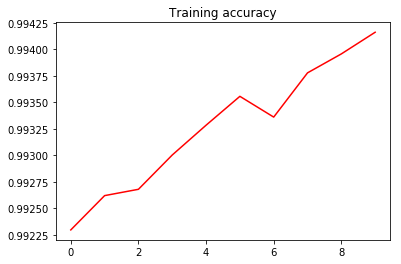

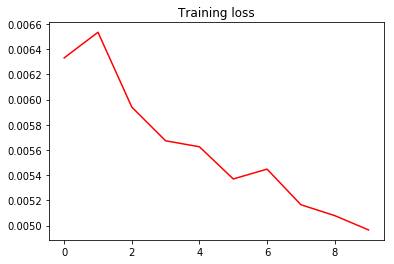

In [83]:
import matplotlib.pyplot as plt
def plot_training(history):
    acc = history.history.history['acc']
    loss = history.history.history['loss']
    epochs = range(len(acc))
  
    plt.plot(epochs, acc, 'r')
    plt.title('Training accuracy')
  
    plt.figure()
    plt.plot(epochs, loss, 'r')
    plt.title('Training loss')
    plt.show()
  
plot_training(model)

# sklearn

In [70]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier()
start_time = time.time()
clf.fit(x_train, y_train)
end_time = time.time()
pred = clf.predict(x_test)
print ("sklearn neural network Accuracy: " + str(metrics.accuracy_score(pred,y_test)))
print ("total running time:" + str(end_time - start_time))
print ("precision: " + str(metrics.precision_score(y_test, pred, average='macro')))
print ("recall:" + str(metrics.recall_score(y_test, pred, average='macro')))
print ("confusion matrix:" + str(metrics.confusion_matrix(y_test, pred)))

C:\Users\Aamir\AppData\Local\conda\conda\envs\[tensorflow]\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


sklearn neural network Accuracy: 0.9746474792350782
total running time:0.7992281913757324
precision: 0.9725154612385811
recall:0.9671836709117532
confusion matrix:[[14242   201]
 [  324  5941]]
